- conda install -c conda-forge folium
- conda install -c conda-forge shapely
- conda install -c conda-forge pyproj
- brew install geos
- conda install sunpy

In [272]:
# これを使う
import folium
import math
from shapely.geometry import Point, mapping
import pyproj
from shapely.ops import transform

RADIUS = 6378137 # 地球の半径(m)

def distance_m2deg(distance_in_m): # 距離(m)を角度に変換
    return distance_in_m/(RADIUS*2*math.pi)*360

def circle(point, radius_m):
    aeqd = f'+proj=aeqd +lat_0={point.y} +lon_0={point.x} +x_0=0 +y_0=0' # point 中心の正距方位図法
    wgs84 = "+proj=longlat +datum=WGS84" # WGS84
    project = pyproj.Transformer.from_crs(aeqd, wgs84).transform # 正距方位図法からWGS84への変換。
    circle_aeqd = point.buffer(radius_m)
    return transform(project, circle_aeqd)

OSAKA = [34.8496017, 135.5814863]                      # 稚内 (緯度、経度)
point_OSAKA = Point(reversed(OSAKA))          # 経度,緯度の順にするため reverse
circle_OSAKA = circle(point_OSAKA, 1000_000) # ポリゴン
a_map = folium.Map(location=OSAKA, zoom_start=4)
folium.GeoJson( circle_OSAKA,
                style_function=lambda x, fillColor='#59008e', color='#59008e': {
                   "fillColor": fillColor,
                   "color": color,
                   'fillOpacity': 0.0,
                   'opacity': 0.1
        }).add_to(a_map)
a_map

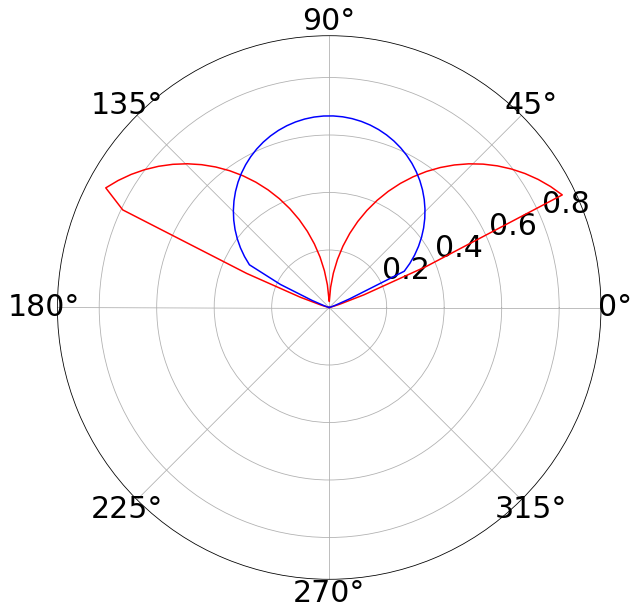

In [337]:
# アンテナの指向性を描く(2D) 図面作成掲載用
import numpy as np 
import matplotlib.pyplot as plt 

def phi2pow(phi, isVertical):
    phi = np.pi - phi if phi > np.pi/2 else phi
    if phi < np.pi/7:
        if isVertical:
            return np.cos(phi) * (phi/(np.pi/7))**8
        return np.sin(phi) * (phi/(np.pi/7))**8/2
    else:
        if isVertical:
            return np.cos(phi)
        return np.sin(phi)/1.5

fig = plt.figure(figsize=(10,10))
plt.rcParams["font.size"] = 30

phis = np.arange(0, np.pi, 0.05)
vert  = [phi2pow(phi, True)  for phi in phis]; plt.polar(phis, vert, color='red')
hor = [phi2pow(phi, False) for phi in phis]; plt.polar(phis, hor, color='blue')



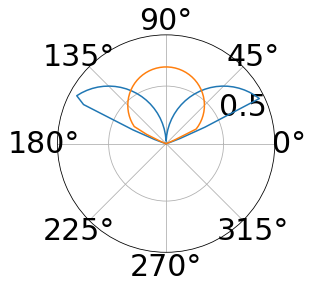

In [224]:
# アンテナの指向性を描く(2D) コード掲載用
import numpy as np 
import matplotlib.pyplot as plt 

def phi2pow(phi, isVertical):
    phi = np.pi - phi if phi > np.pi/2 else phi
    if phi < np.pi/7:
        if isVertical:
            return np.cos(phi) * (phi/(np.pi/7))**8
        return np.sin(phi) * (phi/(np.pi/7))**8/2
    else:
        if isVertical:
            return np.cos(phi)
        return np.sin(phi)/1.5
phis = np.arange(0, np.pi, 0.05)
vert = [phi2pow(phi, True)  for phi in phis];plt.polar(phis,vert)
hor  = [phi2pow(phi, False) for phi in phis];plt.polar(phis,hor)


(0.0, 1.0)

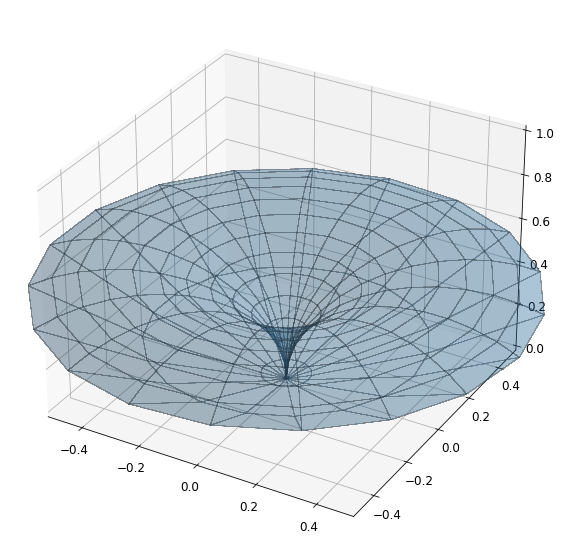

In [214]:
# 図面作成用

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

theta, phi = np.linspace(0, 2*np.pi, 20), np.linspace(0,np.pi/2,20)
THETA, PHI = np.meshgrid(theta, phi)
R = np.vectorize(lambda x: phi2pow(np.pi/2-x,True))(PHI)
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, #cmap=plt.get_cmap('jet'),
    linewidth=0.2,edgecolors=(0.2,0.2,0.2,0.2), antialiased=False, alpha=0.2)

ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_zlim(0,1)


(0.0, 1.0)

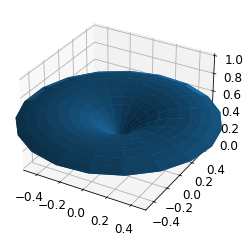

In [217]:
# コード貼り付け図面作成用

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

THETA, PHI=np.meshgrid(np.linspace(0,2*np.pi,20),np.linspace(0,np.pi/2,20))
R=np.vectorize(lambda x: phi2pow(np.pi/2-x,True))(PHI)
X=R*np.sin(PHI)*np.cos(THETA);Y=R*np.sin(PHI)*np.sin(THETA);Z=R*np.cos(PHI)
fig=plt.figure();ax=fig.add_subplot(1,1,1,projection='3d');plot=ax.plot_surface(X,Y,Z)

ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_zlim(0,1)



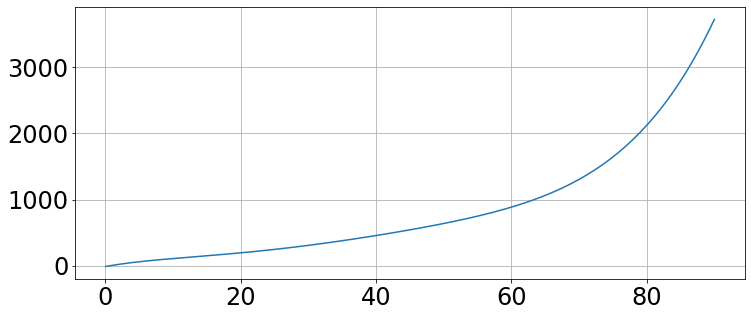

In [336]:
# 送出角に応じた電離層（F層）反射が届く地点までの距離を算出する　図面作成用
import math

RADIUS = 6378137 # 地球の半径(m)
def phi2distance_m(phi):
    return 2*(-0.1732*phi**5+0.8713*phi**4-1.7323*phi**3+1.7449*phi**2-0.9754*phi+0.2917)*RADIUS

phis = np.arange(0, np.pi/2, 0.01)
distance_km = [phi2distance_m(phi)/1000 for phi in phis]
fig = plt.figure(figsize=(12,5))
plt.rcParams["font.size"] = 24
plt.plot(90-phis*180/math.pi, distance_km)
plt.grid()

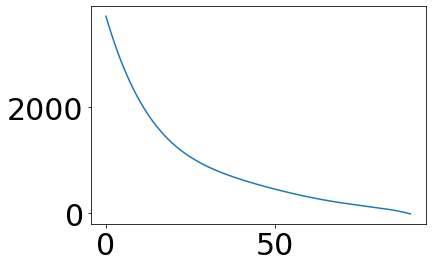

In [296]:
# 送出角に応じた電離層（F層）反射が届く地点までの距離を算出する　コード掲載用
import math

RADIUS = 6378137 # 地球の半径(m)
def phi2distance_m(phi):
    return 2*(-0.1732*phi**5+0.8713*phi**4-1.7323*phi**3+1.7449*phi**2-0.9754*phi+0.2917)*RADIUS
phis = np.arange(0, np.pi/2, 0.01); distance_km = [phi2distance_m(phi)/1000 for phi in phis]
plt.plot(90-phis*180/math.pi, distance_km)

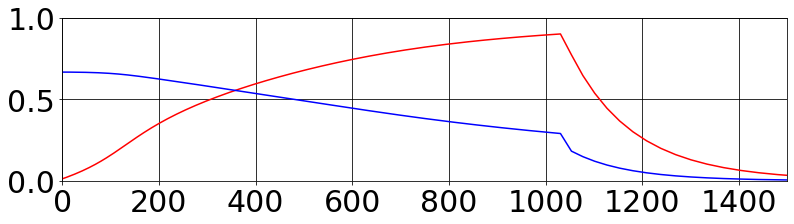

In [264]:
# 距離 v.s. 強度　図面作成用

pow_vert = [phi2pow(phi, True) for phi in phis]
pow_hor = [phi2pow(phi, False) for i, phi in enumerate(phis)]
pow2_vert = [phi2pow(phi, True)/((distance_m[i]+300*2)**2)*100000 for i, phi in enumerate(phis)]
pow2_hor = [phi2pow(phi, False)/((distance_m[i]+300*2)**2)*100000 for i, phi in enumerate(phis)]

fig = plt.figure(figsize=(13,3))
plt.plot(distance_km, pow_vert, color='red')
plt.plot(distance_km, pow_hor, color='blue')

plt.ylim([0,1])
plt.xlim([0,1500])
plt.grid(which='major',color='black',linestyle='-')
plt.grid(which='minor',color='black',linestyle='-')


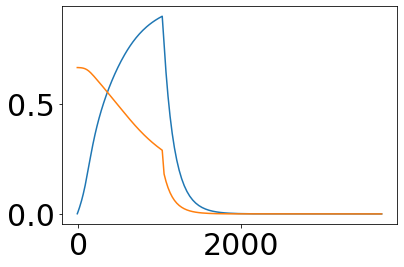

In [255]:
# 距離 v.s. 強度　コード掲載用

pow_vert = [phi2pow(phi, True) for phi in phis];plt.plot(distance_m, pow_vert)
pow_hor  = [phi2pow(phi, False) for i, phi in enumerate(phis)];plt.plot(distance_m, pow_hor)
pow2_vert = [phi2pow(phi, True)/((distance_m[i]+300*2)**2)*100000  for i, phi in enumerate(phis)]
pow2_hor  = [phi2pow(phi, False)/((distance_m[i]+300*2)**2)*100000 for i, phi in enumerate(phis)]
plt.plot(distance_km, pow2_vert);plt.plot(distance_km, pow2_hor)


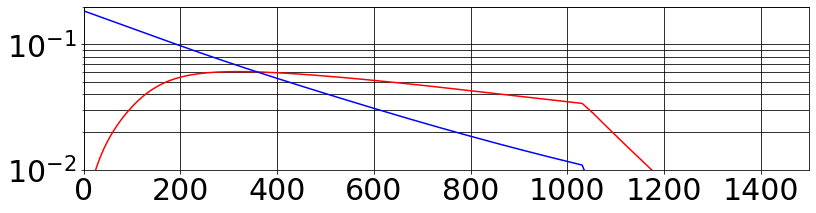

In [265]:
# 図面作成用
fig = plt.figure(figsize=(13,3))
plt.plot(distance_km, pow2_vert, color='red')
plt.plot(distance_km, pow2_hor, color='blue')

plt.ylim([0.01,0.2])
plt.yscale('log',base=10)
plt.xlim([0,1500])

plt.grid(which='major',color='black',linestyle='-')
plt.grid(which='minor',color='black',linestyle='-')

#plt.xlim([0,3000000])

/opt/anaconda3/envs/SD202304_radio/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  ErfaWarning)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/opt/anaconda3/envs/SD202304_radio/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "dtf2d" yielded 2532 of "dubious year (Note 6)"
  ErfaWarning)
/opt/anaconda3/envs/SD202304_radio/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "d2dtf" yielded 2532 of "dubious year (Note 5)"
  ErfaWarning)
/opt/anaconda3/envs/SD202304_radio/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  ErfaWarning)


Text(0.5, 0, 'YEAR')

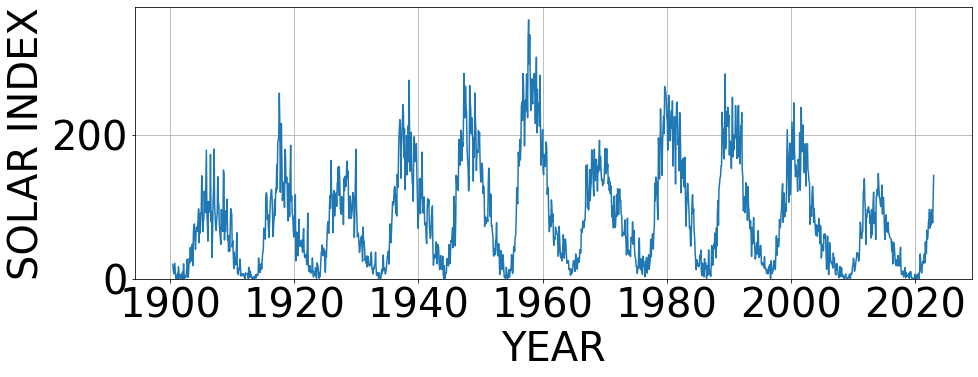

In [190]:
# 太陽活動周期を描く（図面作成用）
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.time import Time, TimeDelta
from astropy.visualization import time_support
import sunpy.timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.time import TimeRange

tr = TimeRange("1900-06-01 00:00", Time.now())
#tr = TimeRange("1983-01-01 00:00", "1985-12-31 00:00")
result = Fido.search(a.Time(tr), a.Instrument('noaa-indices'))
noaa = ts.TimeSeries(Fido.fetch(result), source='noaaindices').truncate(tr)
plt.figure(figsize=(15,5)); plt.plot(noaa.index, noaa.quantity('sunspot RI'))
#plt.figure(figsize=(3,3)); plt.plot(noaa.index, noaa.quantity('sunspot RI'))

plt.rcParams['font.family'] = 'MS Gothic'
plt.rcParams["font.size"] = 40                 # 文字の大きさ
#plt.rcParams["font.size"] = 14                 # 文字の大きさ

plt.ylim(bottom=0)
plt.grid()
plt.ylabel('SOLAR INDEX')
plt.xlabel('YEAR')

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/opt/anaconda3/envs/SD202304_radio/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "dtf2d" yielded 2532 of "dubious year (Note 6)"
  ErfaWarning)
/opt/anaconda3/envs/SD202304_radio/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "d2dtf" yielded 2532 of "dubious year (Note 5)"
  ErfaWarning)
/opt/anaconda3/envs/SD202304_radio/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  ErfaWarning)


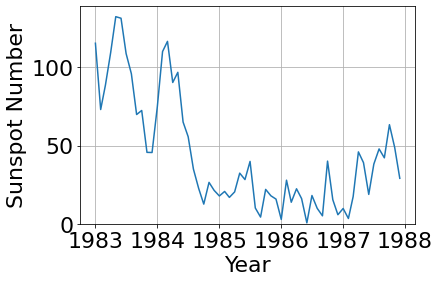

In [203]:
time_range = TimeRange("1983-01-01 00:00", "1987-12-30 00:00") #Time.now())

result = Fido.search(a.Time(time_range), a.Instrument('noaa-indices'))
f_noaa_indices = Fido.fetch(result)
noaa = ts.TimeSeries(f_noaa_indices, source='noaaindices').truncate(time_range)
#time_support()
plt.figure(); plt.plot(noaa.index, noaa.quantity('sunspot RI'))

plt.ylim(bottom=0)
plt.rcParams["font.size"] = 22 
plt.ylabel('Sunspot Number')
plt.xlabel('Year')
plt.grid()
#plt.legend()

In [330]:
# これを使う
import folium
import math
from shapely.geometry import Point, mapping
import pyproj
from shapely.ops import transform

RADIUS = 6378137 # 地球の半径(m)

def distance_m2deg(distance_in_m): # 距離(m)を角度に変換
    return distance_in_m/(RADIUS*2*math.pi)*360

def circle(point, radius_m):
    aeqd = f'+proj=aeqd +lat_0={point.y} +lon_0={point.x} +x_0=0 +y_0=0' # point 中心の正距方位図法
    wgs84 = "+proj=longlat +datum=WGS84" # WGS84
    project = pyproj.Transformer.from_crs(aeqd, wgs84).transform # 正距方位図法からWGS84への変換。
    circle_aeqd = point.buffer(radius_m)
    return transform(project, circle_aeqd)

OSAKA = [34.8496017, 135.5814863]            #  (緯度、経度)
point_OSAKA = Point(reversed(OSAKA))         # 経度,緯度の順にするため reverse

#plt.plot(distance_m, pow2_vert, color='red')

a_map = folium.Map(location=OSAKA, zoom_start=4)
for ind, km in enumerate(distance_km):
    distance_m = abs(int(km*1000))
    if 0<distance_m and distance_m<1100_000:
        opa = (math.log10(pow2_vert[ind])+4)/4.
        #print(opa)
        circle_OSAKA = circle(point_OSAKA, distance_m) # ポリゴン
        folium.GeoJson( circle_OSAKA,
                style_function=lambda x, fillColor='#59008e', color='#ff0000': {
                   "fillColor": fillColor,
                   "color": color,
                   'fillOpacity': 0.0,
                    'weight':200,
                   'opacity':opa
        }).add_to(a_map)

a_map